In [39]:
import numpy as np #importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [40]:
sales=pd.read_csv('/content/sales_data_with_discounts.csv')
sales

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [41]:
sales.info() #all information about the given data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


#Descriptive Analytics for Numerical Columns

In [42]:
sales.describe() #for identifing numerical columns & also provided summary of data like- mean, median & standard deviation.

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


Volume, Avg price ,Total Sales Value, Discount Rate, Discount amount & Net Sales Value , These are the numerical columns in given dataset.



In [43]:
numerical_columns=sales.select_dtypes(include=['int64','float64']).columns #identifying numerical columns
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [44]:
sales_mode=sales[numerical_columns].mode() #calculating mode of numerical columns
print("Mode:",sales_mode)


Mode:      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0       3.0      400.0            24300.0           5.007822        69.177942   
1       NaN      450.0                NaN           5.055218        73.025199   
2       NaN      500.0                NaN           5.059801        93.649161   
3       NaN     1300.0                NaN           5.072124        94.682735   
4       NaN     8100.0                NaN           5.084108       102.705757   
..      ...        ...                ...                ...              ...   
445     NaN        NaN                NaN          19.940610     17900.983733   
446     NaN        NaN                NaN          19.965340     21153.498820   
447     NaN        NaN                NaN          19.976879     21496.675367   
448     NaN        NaN                NaN          19.982257     25328.224204   
449     NaN        NaN                NaN          19.992407     25738.022194   

     Net Sales Value 

#Interpretation :

**Mean:** The mean gives us an average value of the data in the column, which helps in understanding the central tendency.

**Mode:** The median provides a middle point, which is less affected by outliers compared to the mean.

**Median:** The mode tells us the most frequent value in the data.

**Standard Deviation:**the standard deviation indicates the spread of the data.




#Data Visualization

#Histograms

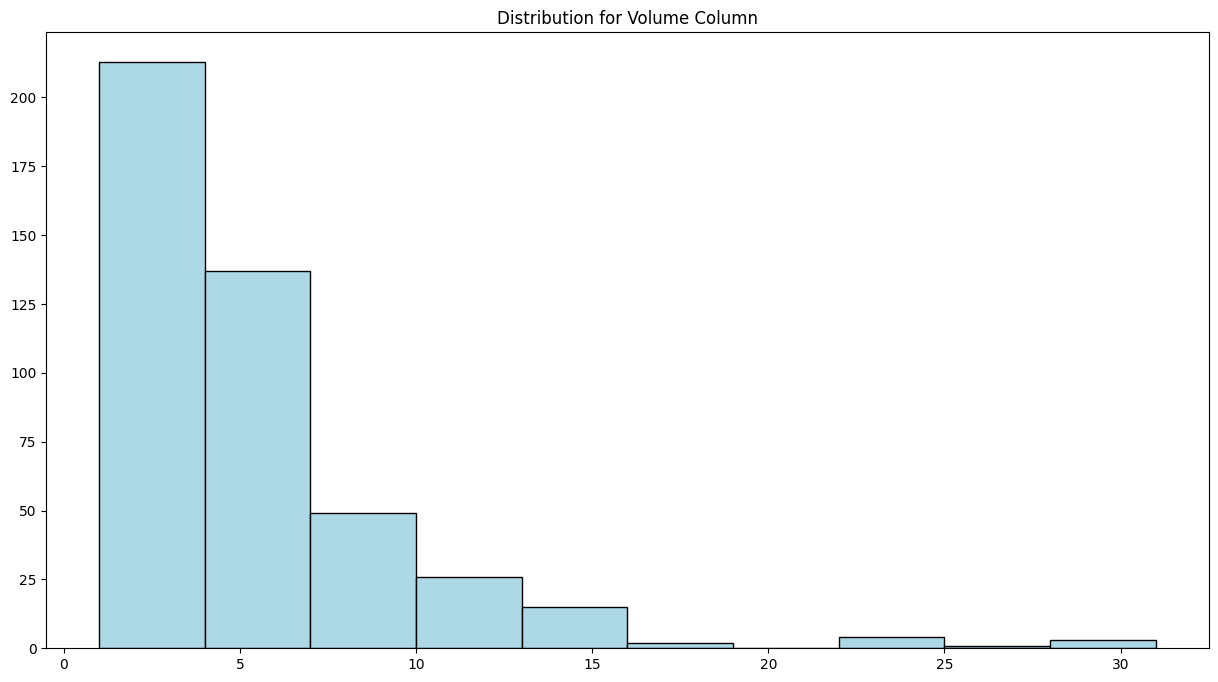

In [45]:
plt.figure(figsize=(15, 8)) #for visualizing Volumne columns
plt.hist(sales['Volume'], bins=10,color='lightblue', edgecolor='black')#ploting historma for 'Volume Column'
plt.title('Distribution for Volume Column') #for title
plt.show()#Displaying the histogram

 In the 'Volume' cloumns, the dataset is right_skewned because the longer tail is on right sides.This is  also referred to as positive skewness.The extremes values are on the right side.

The Mean of the 'volume' column is 5, which is greater than median of the 'Volumne' column, which is 4.

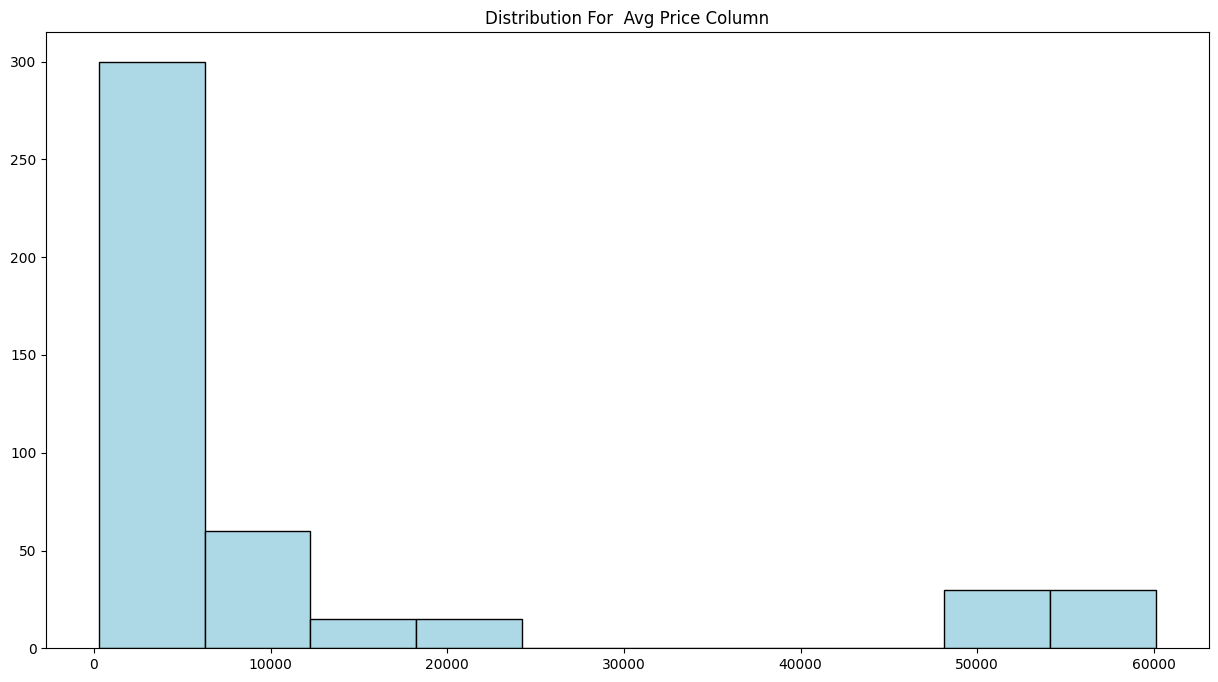

In [46]:
plt.figure(figsize=(15, 8)) #for visualizing Avg Price columns
plt.hist(sales['Avg Price'], bins=10, color='lightblue', edgecolor='black')#ploting historma for 'Avg Price'
plt.title('Distribution For  Avg Price Column')#For Title
plt.show()#Displaying the histogram

 In the 'Avg Price' cloumns, the dataset is right_skewned because the longer tail is on right sides.This is  also referred to as positive skewness.The extremes values are on the right side.

The Mean of the 'Avg Price' column is 10453, which is greater than median of the 'Avg Price' column, which is 1450.

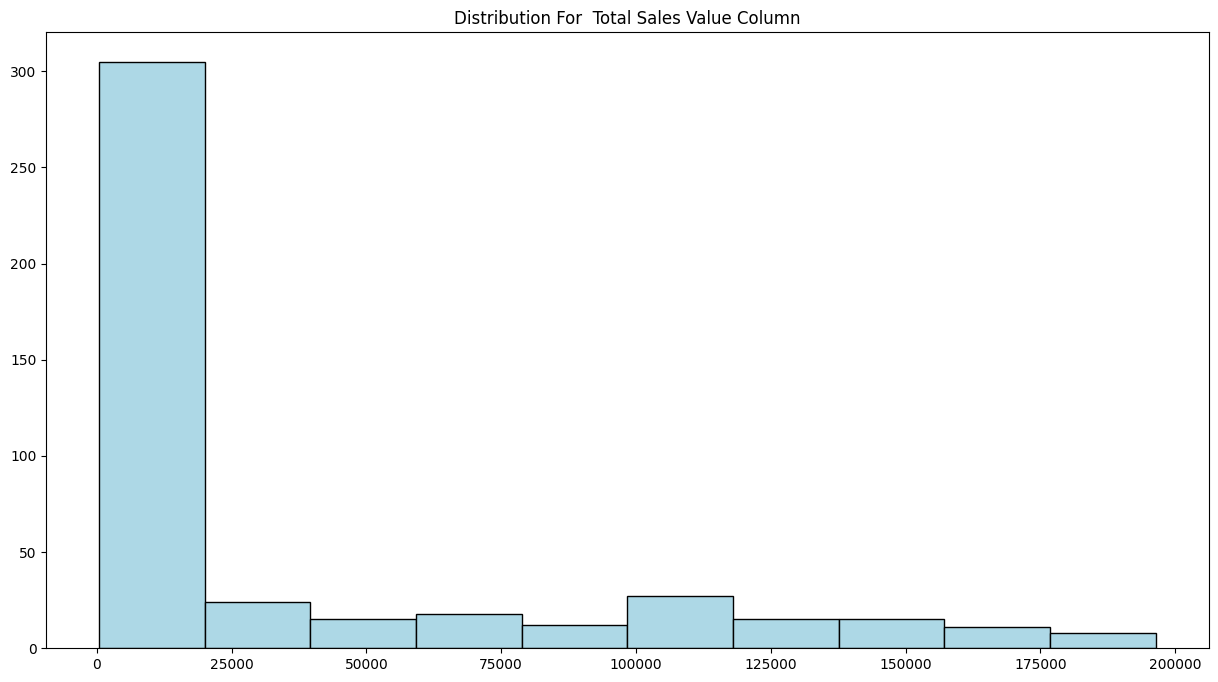

In [50]:
plt.figure(figsize=(15, 8)) #for visualizing Total sales value column
plt.hist(sales['Total Sales Value'], bins=10, color='lightblue', edgecolor='black')#ploting historma for 'Total Sales Value'
plt.title('Distribution For  Total Sales Value Column')#For title
plt.show()#Displaying histogram

In the "Total Sales Value" cloumn, the dataset is right_skewned because the longer tail is on right sides.This is  also referred to as positive skewness.The extremes values are on the right side.

The Mean of the 'Total Sales Value' column is 33812, which is greater than median of the 'Total Sales Value' column, which is 5700.

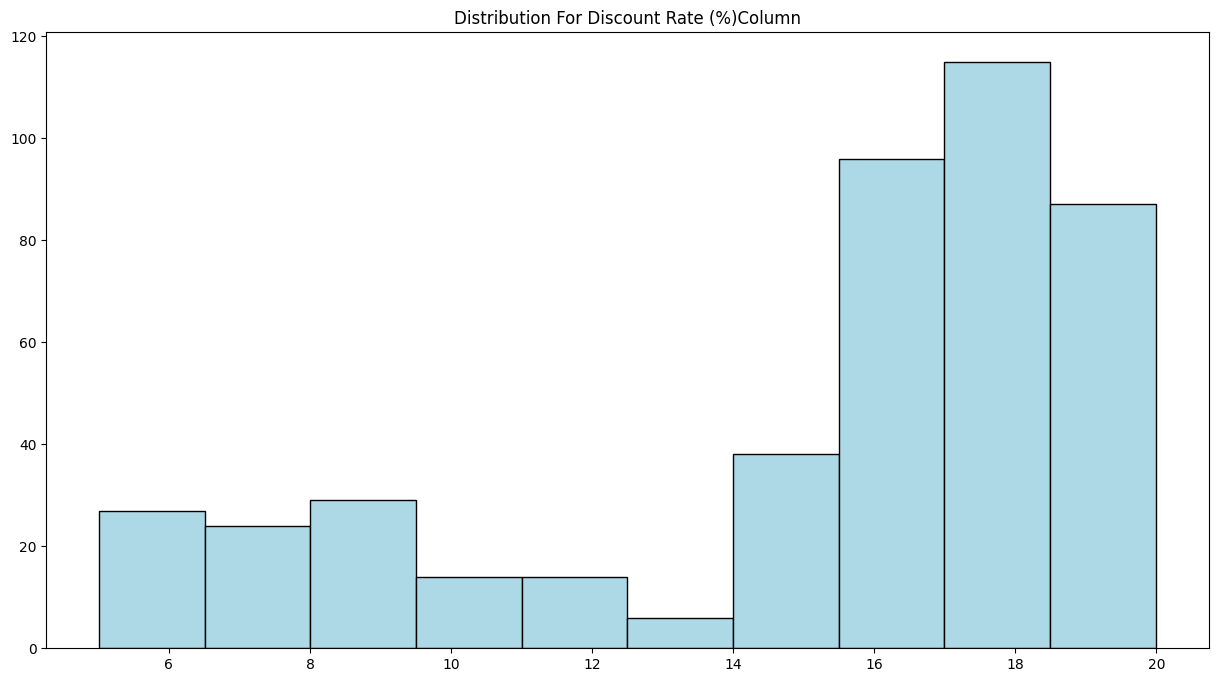

In [49]:
plt.figure(figsize=(15, 8)) #for visualizing Discount Rate (%) column
plt.hist(sales['Discount Rate (%)'], bins=10, color='lightblue', edgecolor='black')#histogram for 'Discount Rate'.
plt.title('Distribution For Discount Rate (%)Column')#For title
plt.show()#Displaying the histogram

In the "Discount Rate (%)" cloumn, the dataset is left-skewned because the longer tail is on left sides.This is also referred to as positive skewness.The extremes values are on the right side.

The Mean of the 'Discount Rate (%)' column is 15.155242	, which is lesser than median of the 'Discount Rate (%)' column, which is 16.577766.

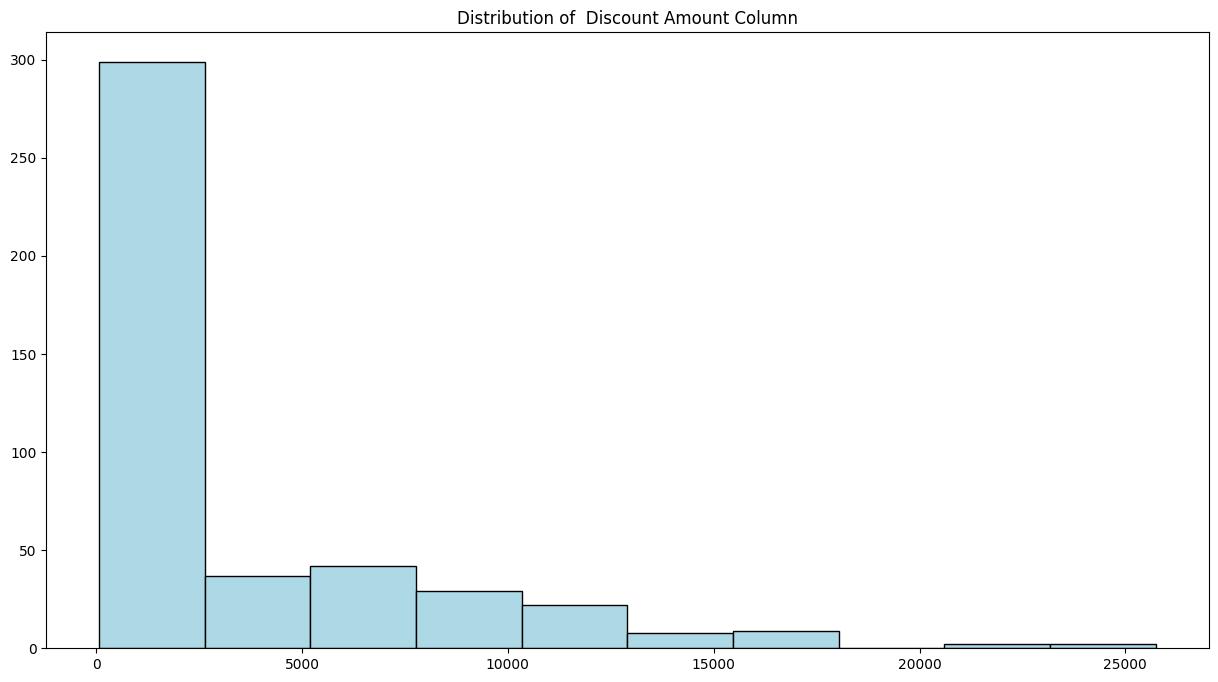

In [13]:
plt.figure(figsize=(15, 8)) #for visualizing Discount Amount column
plt.hist(sales['Discount Amount'], bins=10, color='lightblue', edgecolor='black') #histogram for 'Discount Amount'.
plt.title('Distribution For  Discount Amount Column')#For title
plt.show()#Displaying the histogram

In the "Discount Amount" cloumn, the dataset is right_skewned because the longer tail is on right sides.This is  also referred to as positive skewness.The extremes values are on the right side.

The Mean of the 'Discount Amount' column is 3346.50, which is greater than median of the 'Discount Amount' column, which is 988.93 .

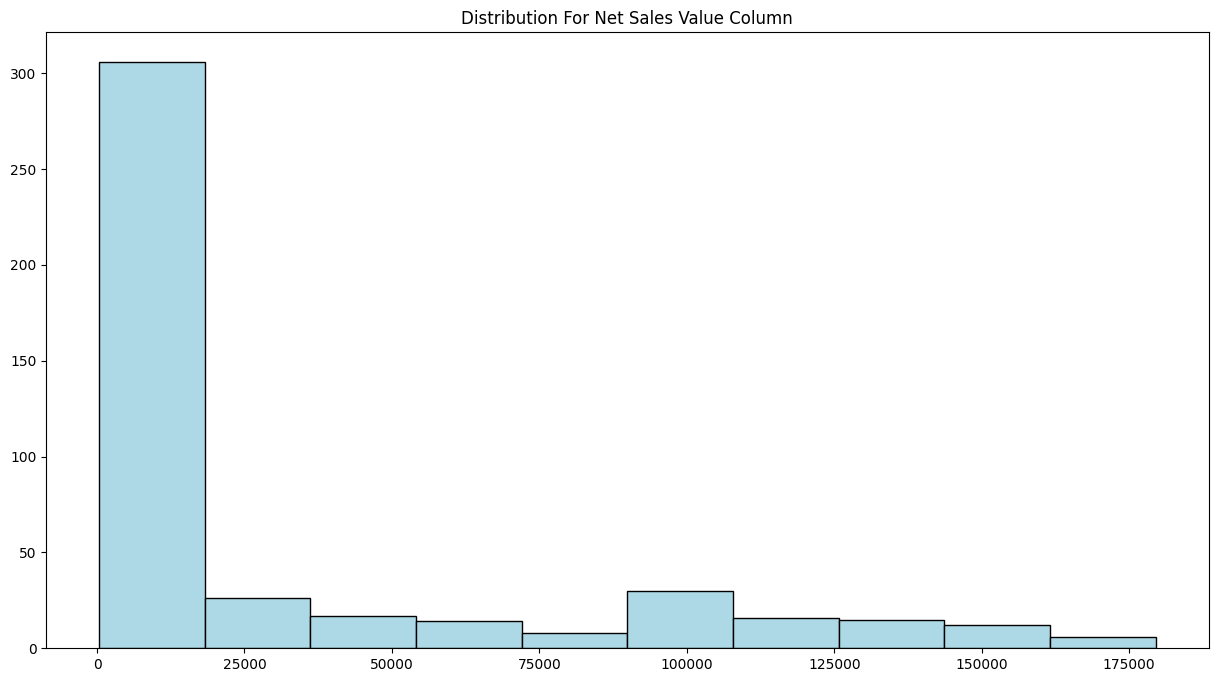

In [51]:
plt.figure(figsize=(15, 8)) #for visualizing Net Sales Value column
plt.hist(sales['Net Sales Value'], bins=10, color='lightblue', edgecolor='black')#histogram for 'Net Sales Value'.
plt.title('Distribution For Net Sales Value Column')#For title
plt.show()##Displaying the histogram

In the "Net Sales Value" cloumn, the dataset is right_skewned because the longer tail is on right sides.This is  also referred to as positive skewness.The extremes values are on the right side.

The Mean of the 'Net Sales Value' column is 30466.33, which is greater than median of the 'Net Sales Value' column, which is 4677.79.

#Boxplots:


In [22]:
Categorical_columns=sales.select_dtypes(include=['object', 'category']).columns #identifying categorical columns
print("Categorical columns are:",Categorical_columns)#printing the categorical columns

Categorical columns are: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


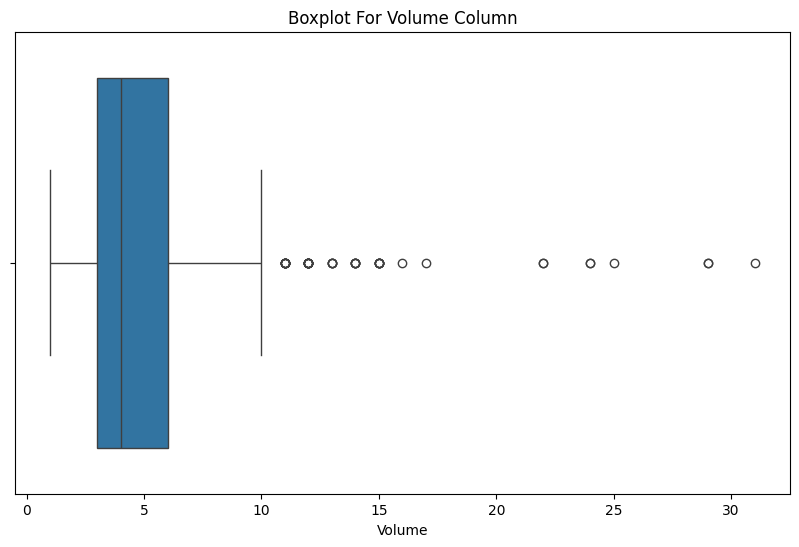

In [52]:
plt.figure(figsize=(10, 6))#Define plot size
sns.boxplot(x=sales['Volume'])#boxplot for 'Volume'
plt.title('Boxplot For Volume Column')#for title
plt.show()#Displaying the boxplot



*   there are outliers at upper bound.
*   the more value are distributed above the median.



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


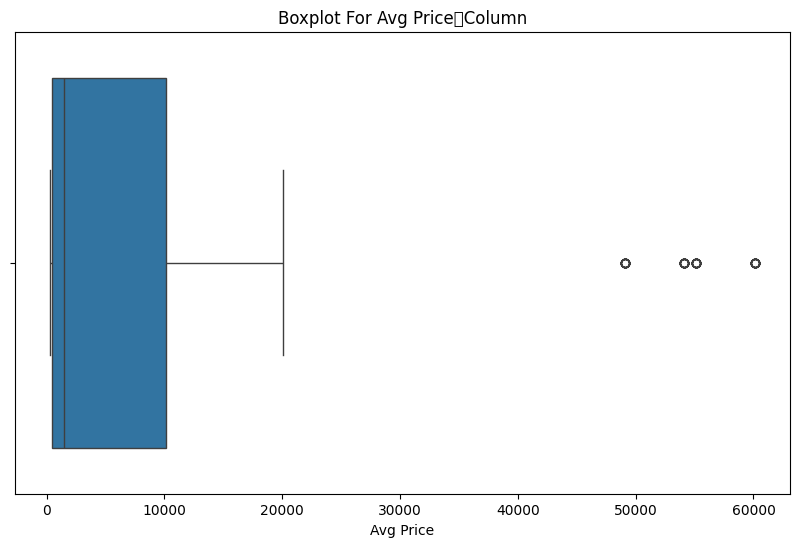

In [53]:
plt.figure(figsize=(10, 6))#Define the plot size
sns.boxplot(x=sales['Avg Price'])#boxplot for 'Avg Price' Column
plt.title('Boxplot For Avg Price	Column')#For title
plt.show()#Displaying the boxplot



*  There are outliers at upper bound
*   the maximum values are distributes above the median.



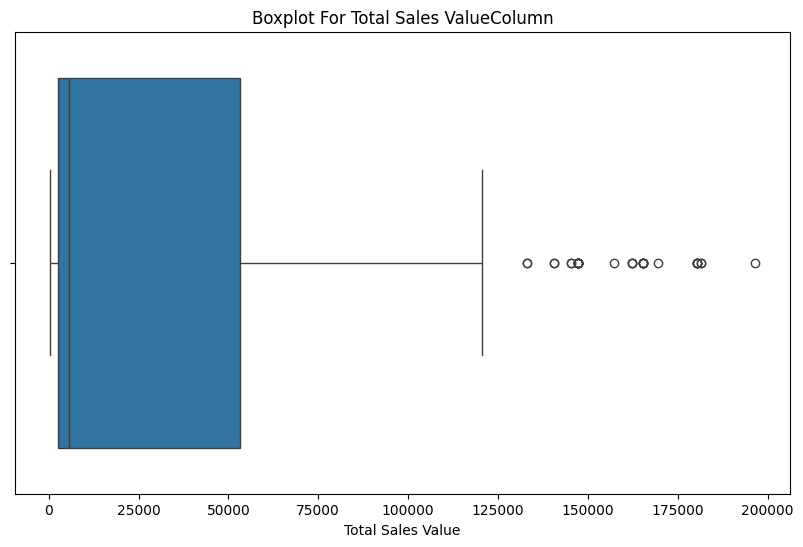

In [54]:
plt.figure(figsize=(10, 6))#Define the plot size
sns.boxplot(x=sales['Total Sales Value'])#boxplot for 'Total sales Value' Column
plt.title('Boxplot For Total Sales ValueColumn')#For title
plt.show()#Displaying the boxplot

* There are outliers at upper bound.
* The maximum values are distributed above the median.



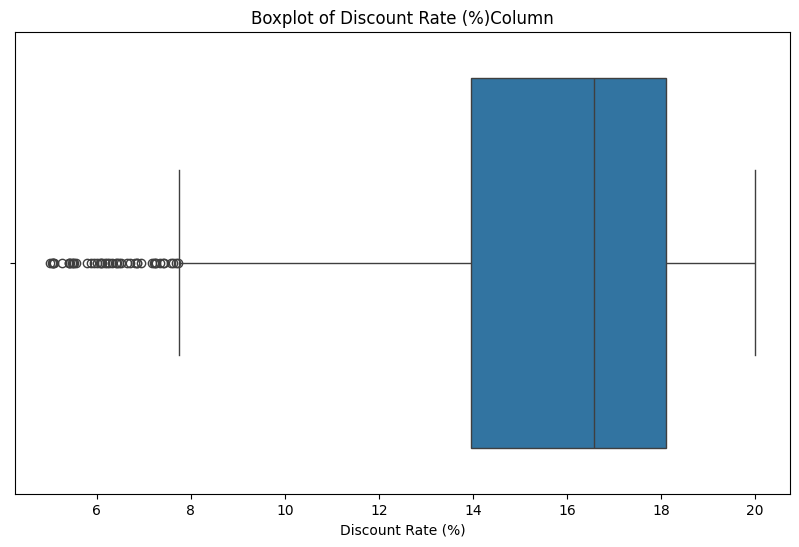

In [55]:
plt.figure(figsize=(10, 6))#Define the plot size
sns.boxplot(x=sales['Discount Rate (%)'])#boxplot for the 'Discount Rate(%)' Column
plt.title('Boxplot of Discount Rate (%)Column')#For title
plt.show()#Displaying the boxplot

* There are outliers at lower bound.
* The maximum values are distributed above the median.
* There are more outliers in this column.

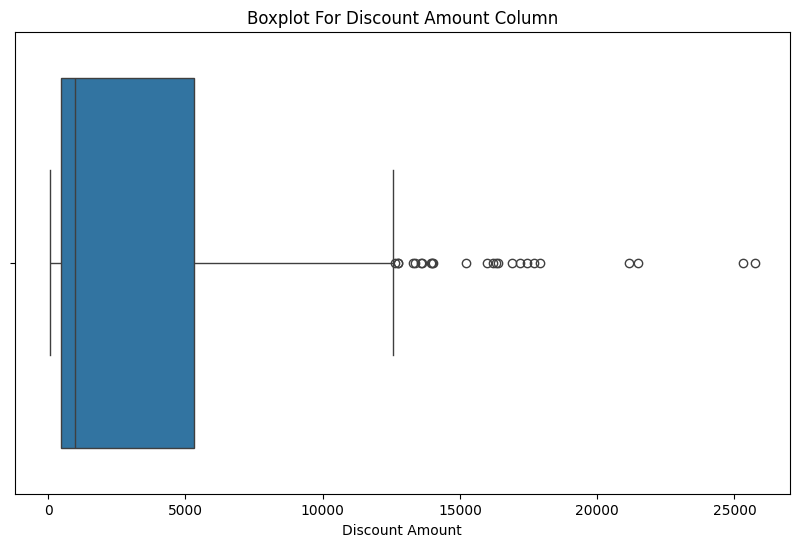

In [59]:
plt.figure(figsize=(10, 6))#define the plot size
sns.boxplot(x=sales['Discount Amount'])#boxplot for the 'Discount Amount' Column
plt.title('Boxplot For Discount Amount Column')#for title
plt.show()#displaying the boxplot

* There are outliers at upper bound.
* The maximum values are distributed above the median.

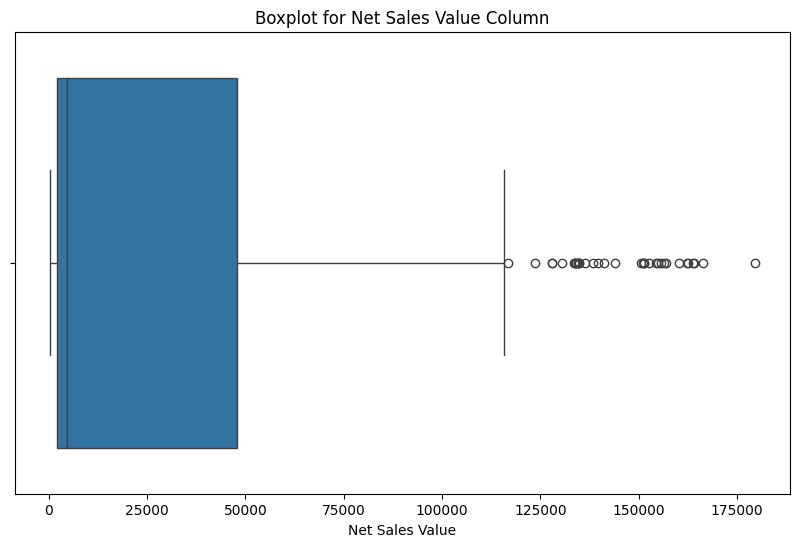

In [60]:
plt.figure(figsize=(10, 6))#define the plot size
sns.boxplot(x=sales['Net Sales Value'])#boxplot for the 'Net sales value' Column
plt.title('Boxplot For Net Sales Value Column')#for title
plt.show()#displaying the boxplot

* There are outliers at upper bound.
* The maximum values are distributed above the median.

#Bar Chart Analysis for Categorical Column:

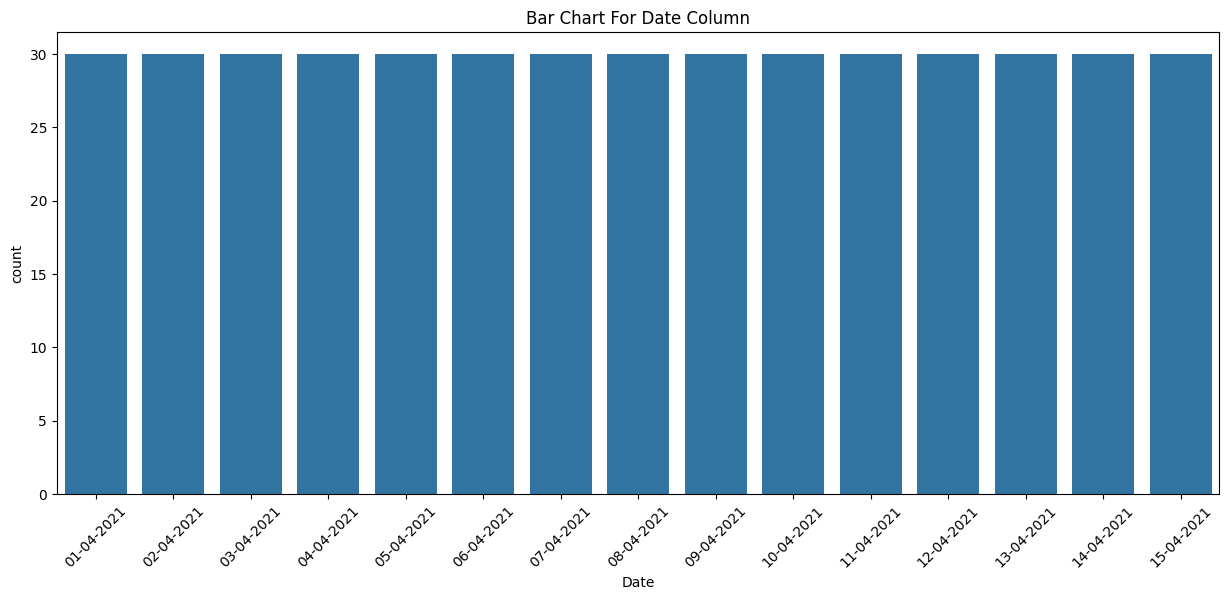

In [62]:
plt.figure(figsize=(15, 6))#Define plot size
sns.countplot(x='Date', data=sales)#plot for 'Date' Column
plt.title('Bar Chart For Date Column')#title of the plot
plt.xticks(rotation=45)#for rotation of x-axis
plt.show()#Displaying the plot



*   In this Date column all categories are equally distributed.
*   The count of the each unique value is 30.



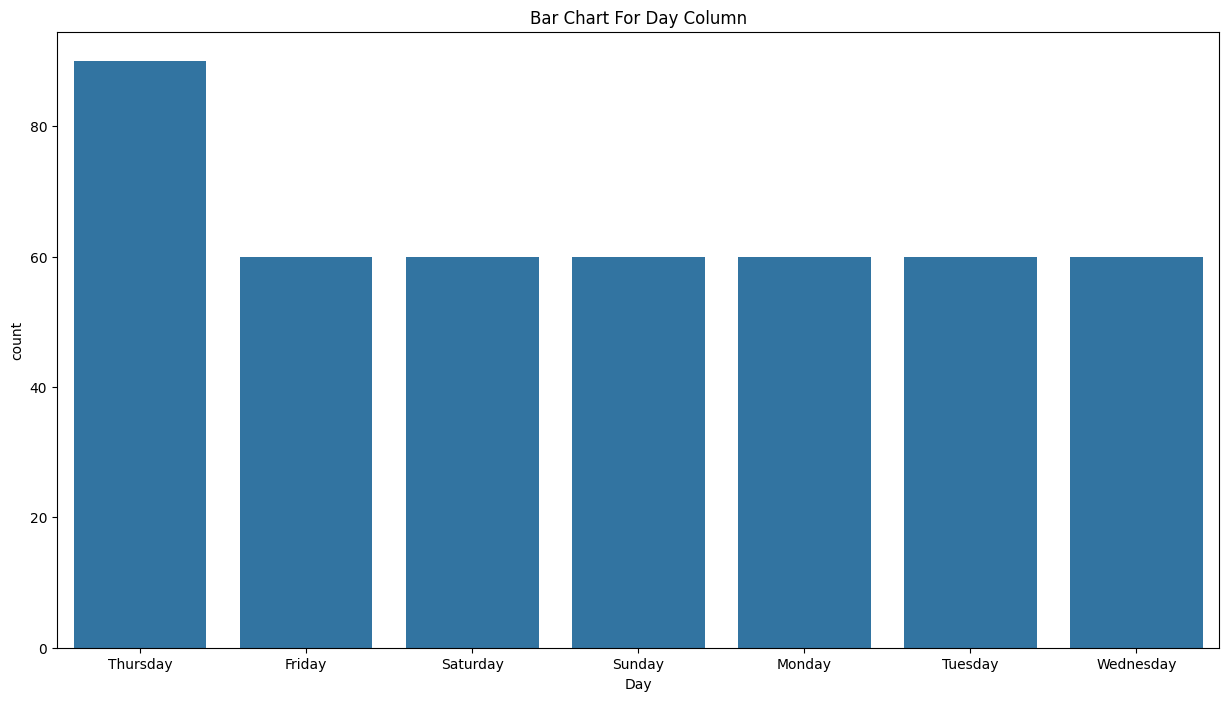

In [63]:
plt.figure(figsize=(15, 8))#Define plot size
sns.countplot(x='Day', data=sales)#plot for 'Day' Column
plt.title('Bar Chart For Day Column')#title of the plot
plt.show()#Displaying the plot



* There are total of 7 unique value in this columns.Every bar prepresent the days of week.
*   All values are distributed equally of 60 expected Thursday.
* Most no. of sales occured on Thursday.





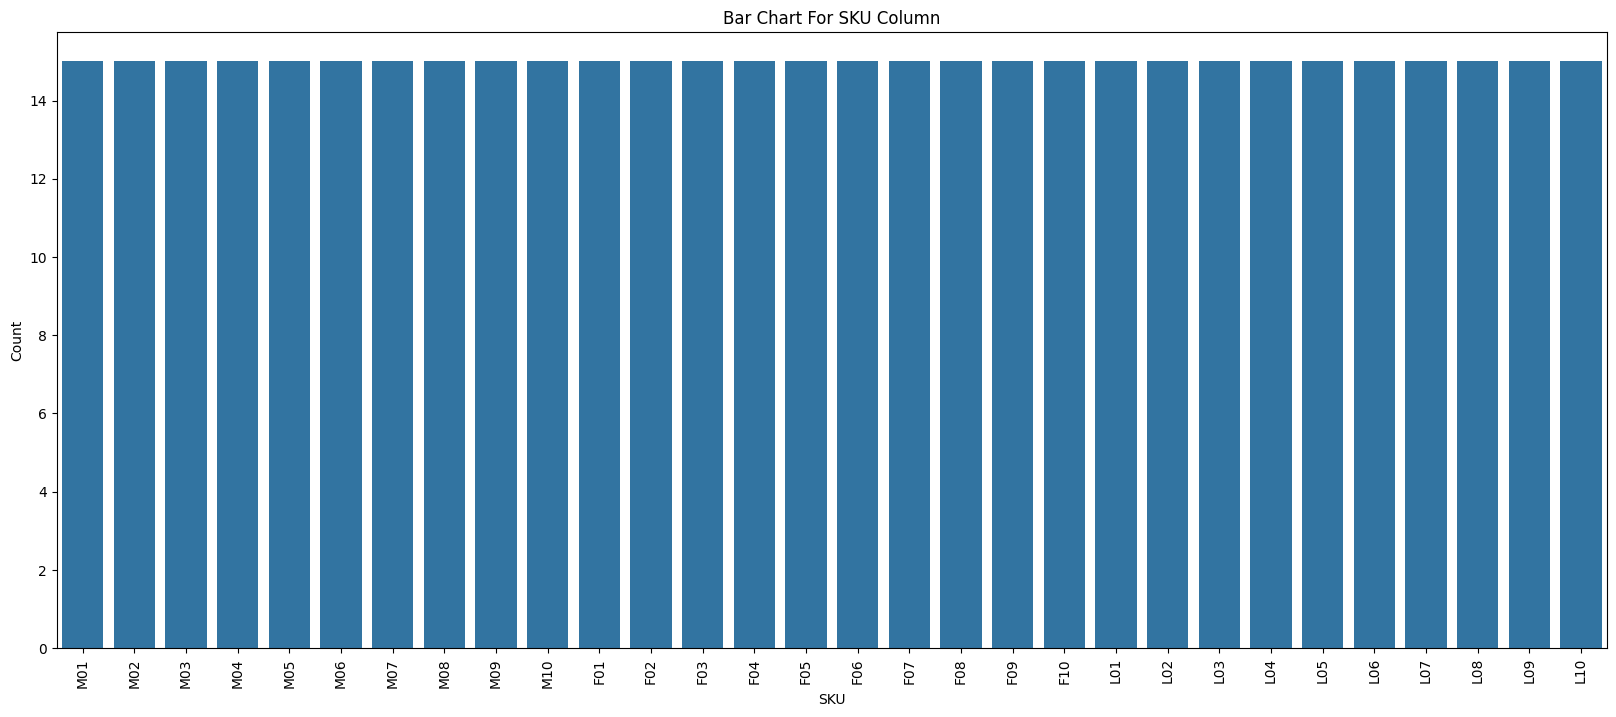

In [34]:
plt.figure(figsize=(20, 8))#Define plot size
sns.countplot(x='SKU', data=sales)#plot for 'SKU' Column
plt.title('Bar Chart For SKU Column')#title of the plot
plt.xlabel('SKU')#title for x-axis
plt.ylabel('Count')#title for y-axis
plt.xticks(rotation=90)#for rotation of x-axis
plt.show()#Displaying the plot



* in this column all categories are equally distributed.
* The count of the each unique value is 15.



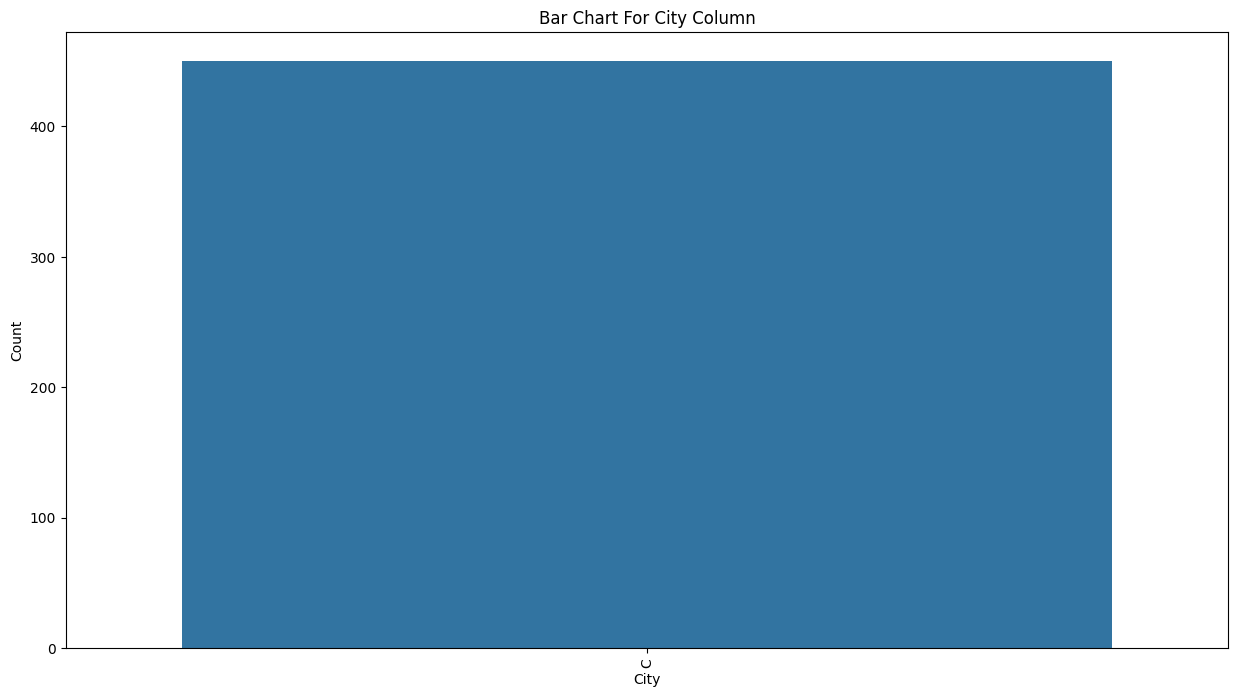

In [33]:
plt.figure(figsize=(15, 8))#Define plot size
sns.countplot(x='City', data=sales)#plot for 'City' Column
plt.title('Bar Chart For City Column')#title of the plot
plt.xlabel('City')#title for x-axis
plt.ylabel('Count')#title for y-axis
plt.xticks(rotation=90)#for rotation of x-axis
plt.show()#Displaying the plot



* There is only one unique value in this column.
* The count of the unique value is 450.



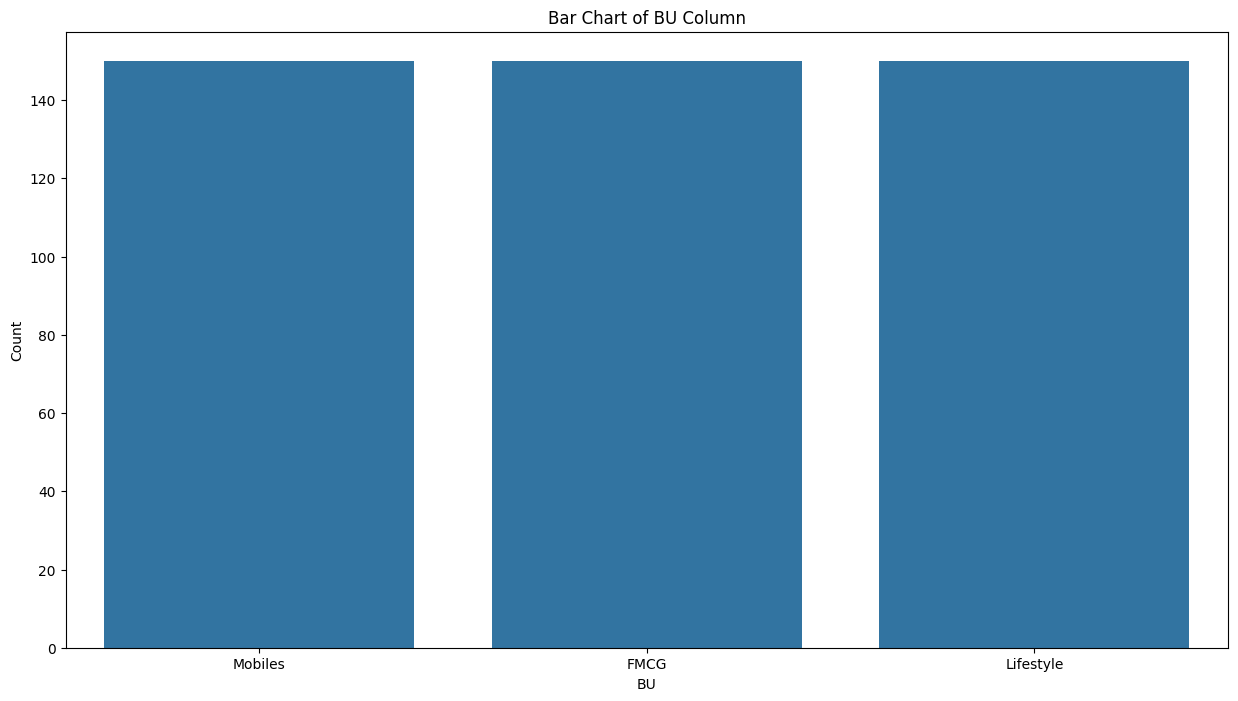

In [ ]:
plt.figure(figsize=(15, 8))#Define plot size
sns.countplot(x='BU', data=sales)#plot for 'BU' Column
plt.title('Bar Chart of BU Column')#title of the plot
plt.xlabel('BU')#title for x-axis
plt.ylabel('Count')#title for y-axis
plt.show()#Displaying the plot



* In this column all categories are equally distributed.
* The count of the each ubique value is 150.
* There are total 3 categories- Mobiles, FMCG & Lifestyle.





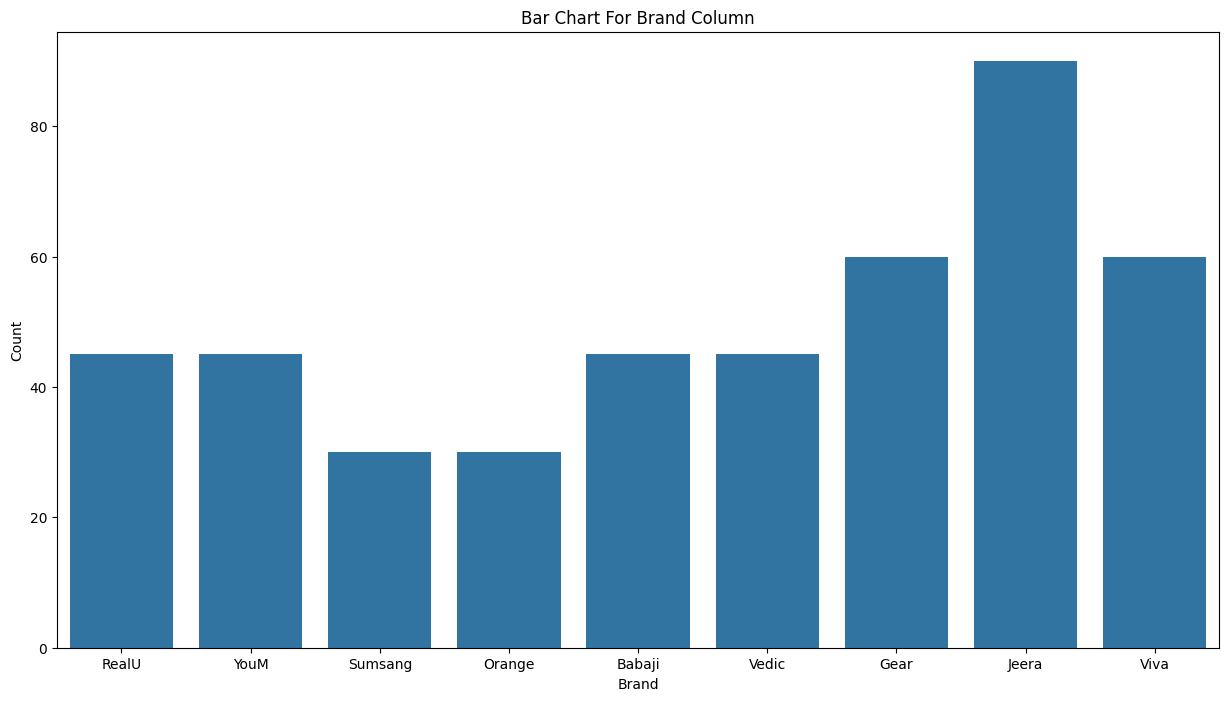

In [64]:
plt.figure(figsize=(15, 8))#Define plot size
sns.countplot(x='Brand', data=sales)#plot for 'Brand' Column
plt.title('Bar Chart For Brand Column')#title of the plot
plt.xlabel('Brand')#title for x-axis
plt.ylabel('Count')#title for y-axis
plt.show()#Displaying plot




* In this Column all categories ase unequally distributed.


* For brand jeera has more sales occured,after this Viva and Gear.



* For Sumsang & Orange has very less occured.





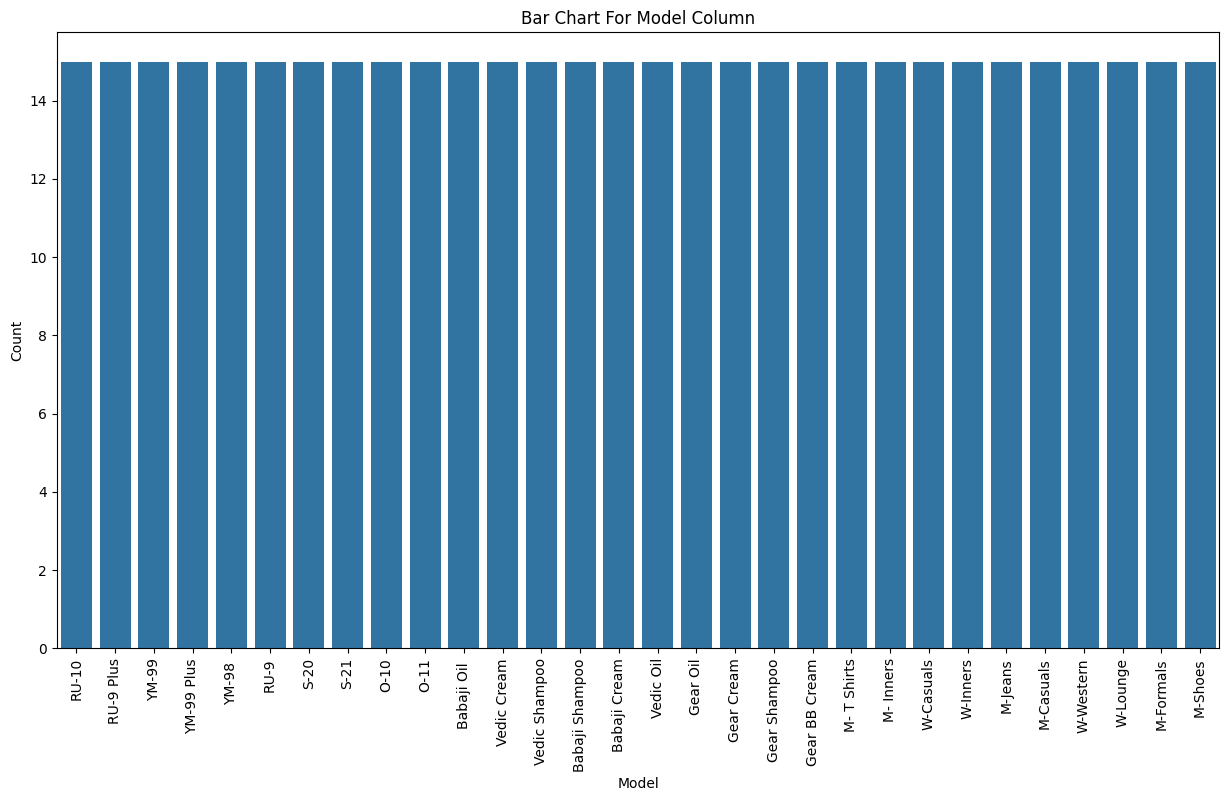

In [65]:
plt.figure(figsize=(15, 8)) # define plot size
sns.countplot(x='Model', data=sales) #plot for 'Model' Column
plt.title('Bar Chart For Model Column')#Title of the Chart
plt.xlabel('Model')#Title for x-axis
plt.ylabel('Count') #Title for y-axis
plt.xticks(rotation=90) #for rotation of x-axis
plt.show()#Displaning plot

#Standardization of Numerical Variables:

**Concept of Standardization(Z- Score Normalization):**

 Standardization is a technique used to transform data so that it has mean of 0 and standard deviation of 1.This process adjust data values based on how farthey deviate from the mean measured in units of standard deviation.


**Formula:**

Z=Original value- Mean of the Value/Stanadard Deviation

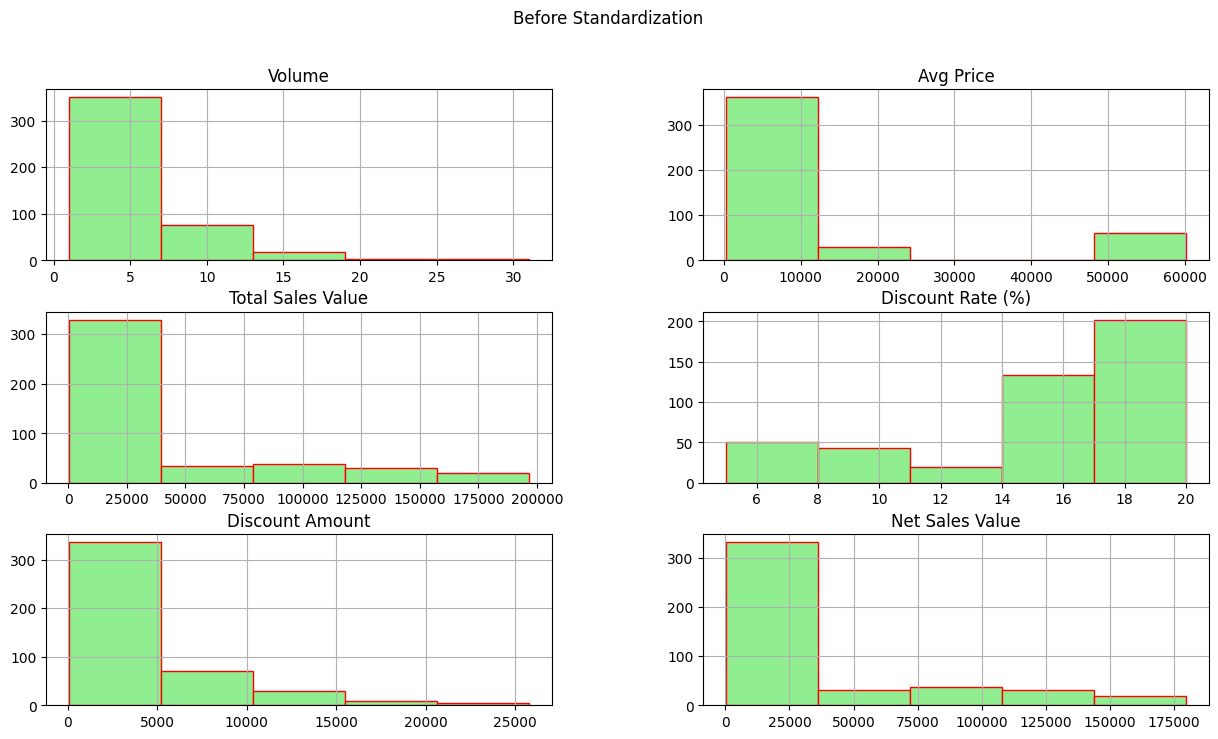

In [17]:
sales.hist(figsize=(15, 8), bins=5, color='lightgreen', edgecolor='red') #Plotting the data before standardization
plt.suptitle("Before Standardization") #For subtitle
plt.show() #To display the plot


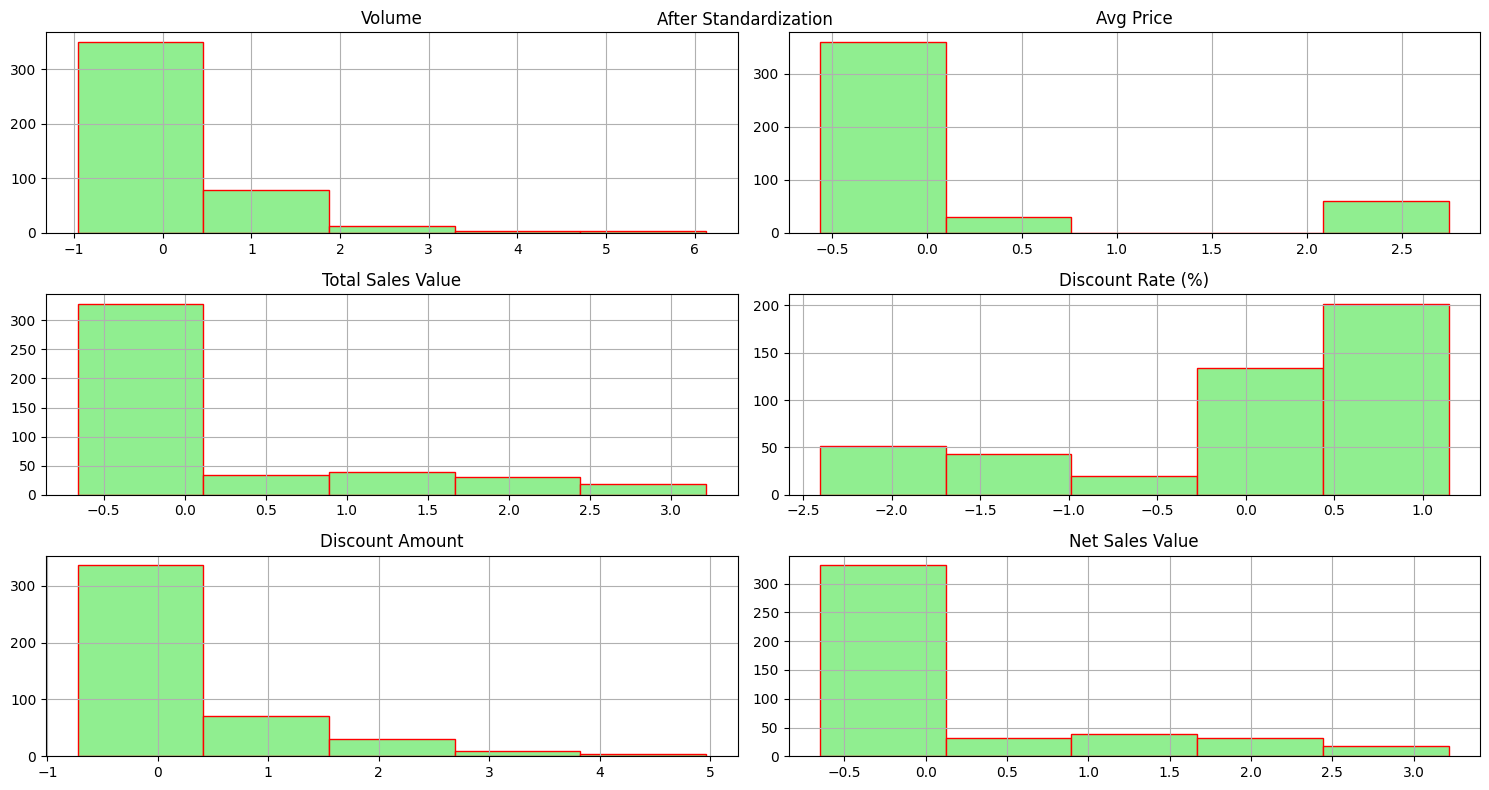

In [18]:
sales_standardized = (sales[numerical_columns] - sales[numerical_columns].mean()) /sales[numerical_columns].std() #Standardizing the numerical columns
sales_standardized.hist(figsize=(15, 8), bins=5, color='lightgreen', edgecolor='red') #Plotting the standardized data
plt.tight_layout() #To avoid overlapping of subplots
plt.suptitle("After Standardization") #For subtitle
plt.show() #To display the plot

#Conversion of Categorical Data into Dummy Variables (One-Hot Encoding)

In [38]:
sales_encoded = pd.get_dummies(sales, columns=['Date','Day','SKU', 'City', 'BU', 'Brand', 'Model'], drop_first=True).astype(int) # Applying hot coding to numerical Columns
sales_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11,21153,160346,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11,11676,89323,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9,10657,102042,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6,8364,112235,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17,4372,19927,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15,402,2197,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17,2660,12939,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18,606,2593,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16,957,4742,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Conclusion:

**1.Sales Volume Distribution Mean Volume:** 5.07 units

**Standard Deviation:** 4.23 units

**Range:**1 to 450 units



*   The histogram shows a high frequency at the lower end, indicating that most


sales volumes are low.

**2. Average Price Distribution**

**Mean Average Price:** 10,453.40

**Standard Deviation:** 18,079.90

**Range:** 290 to 60,100



* The histogram reveals a right-skewed distribution, suggesting that while most
products are priced lower, a few high-priced items significantly raise the average price.

**3. Total Sales Value Distribution**

**Mean Total Sales Value:** 33,812.80

**Standard Deviation:** 50,535.10

**Range:** 400 to 196,400



* The histogram indicates a right-skewed distribution, similar to average prices, with most sales values clustering at the lower end.

**4. Discount Rate Distribution**

**Mean Discount Rate:** 15.16%

**Standard Deviation:** 4.22%

**Range:** 5.01% to 450%



* The histogram shows a concentration of discount rates at lower percentages, with a few outliers showing extremely high discount rates.

**5.Net Sales Value Distribution**

**Mean Net Sales Value:** 30,466.34

**Standard Deviation:** 46,358.66

**Range:** 326.97 to 179,507.48


* The histogram for net sales values shows a distribution with multiple peaks,
indicating variability in how net sales are spread across different sales values.

* Data preprocessing is a crucial step in data analysis and machine learning, as it enables accurate and reliable modeling.



* Standardization and one-hot encoding are two essential preprocessing techniques.



* Standardization scales data to a common range to prevent features with large ranges from dominating others.

*  One-hot encoding converts categorical variables into binary vectors, allowing them to be processed by models.

* These techniques help prevent data leakage, improve model interpretability, and enable more efficient computation.
* By applying standardization and one-hot encoding, you can ensure that your data is clean, consistent, and ready for analysis and modeling.


